In [122]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_color_codes("colorblind")

results_raw = pd.read_parquet("results/performance.parquet")
ecmo_size = torch.load("cache/ihmtensors/X_ecmo.pt").shape[0]

results_raw['Fine Tuning Size'] = results_raw['Fine Tuning Size'].apply(lambda x: ecmo_size if x == 0 else x)
#results_raw['Pretraining'] = results_raw['Pretraining'].fillna('Unpretrained')

pretty_names_map = {
    'combined': 'All ICUs',
    'micu': 'Medical',
    'sicu': 'Surgical',
    'cvicu': 'Cardiovascular',
    'ccu': 'Coronary Care Unit',
    'tsicu': 'Trauma Surgical',
    'nsicu': 'Neurosurgical',
    'msicu': 'Medical Surgical',
    None: 'Unpretrained'
}

results_raw['Pretraining'] = results_raw['Pretraining'].apply(lambda x: pretty_names_map[x])
results_raw = results_raw.rename(columns={'Pretraining': 'ICU Type'})


# Performance vs. Fine-Tuning Size

In [123]:
pvft = results_raw[results_raw['Pretraining Size'] == 0].drop(columns=['Pretraining Size'])
pvft = pvft[(pvft['ICU Type'] == 'All ICUs') | (pvft['ICU Type'] == 'Medical')]
pvft

,ICU Type,Fine Tuning Size,Score,Seed,Timestamp
2,Medical,20,0.395604,42,2023-11-11 06:31:08.380445
6,All ICUs,20,0.505051,42,2023-11-11 06:31:08.380445
13,All ICUs,30,0.764706,42,2023-11-11 06:31:44.759917
14,Medical,30,0.626794,42,2023-11-11 06:31:44.759917
19,All ICUs,40,0.775253,42,2023-11-11 06:32:44.820658
...,...,...,...,...,...
331,All ICUs,60,0.730861,4,2023-11-11 07:35:53.718382
333,Medical,70,0.790833,4,2023-11-11 07:38:44.370540
334,All ICUs,70,0.805000,4,2023-11-11 07:38:44.370540
349,All ICUs,75,0.819041,4,2023-11-11 07:42:01.241930


[Text(0.5, 1.0, 'Model Performance vs. Fine-Tuning Dataset Size')]

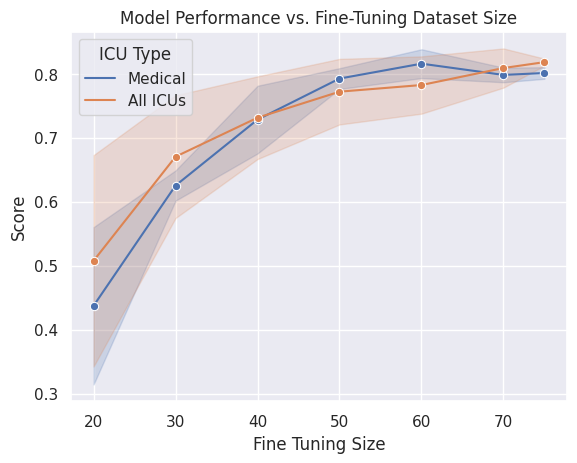

In [124]:
sns.set_theme()

sns.lineplot(
    data=pvft, 
    x="Fine Tuning Size", 
    y="Score", 
    hue="ICU Type", 
    marker='o',
    errorbar=("se", 2),
).set(title='Model Performance vs. Fine-Tuning Dataset Size')

# Fixed (n = 1000) vs. Maximum Pretraining Size

In [125]:
fvmp = results_raw[results_raw['Fine Tuning Size'] == ecmo_size].drop(columns=['Fine Tuning Size'])
fixed_pretraining = fvmp[fvmp['Pretraining Size'] == 1000]
max_pretraining = fvmp[fvmp['Pretraining Size'] == 0]

In [126]:
fixed_pretraining

,ICU Type,Pretraining Size,Score,Seed,Timestamp
63,Surgical,1000,0.745640,42,2023-11-11 06:45:42.789454
64,Coronary Care Unit,1000,0.728198,42,2023-11-11 06:45:42.789454
65,Cardiovascular,1000,0.725291,42,2023-11-11 06:45:42.789454
66,Unpretrained,1000,0.654797,42,2023-11-11 06:45:42.789454
67,Trauma Surgical,1000,0.710029,42,2023-11-11 06:45:42.789454
68,Medical,1000,0.769622,42,2023-11-11 06:45:42.789454
69,Medical Surgical,1000,0.755814,42,2023-11-11 06:45:42.789454
70,Neurosurgical,1000,0.699128,42,2023-11-11 06:45:42.789454
71,All ICUs,1000,0.683140,42,2023-11-11 06:45:42.789454
135,Trauma Surgical,1000,0.680959,1,2023-11-11 07:00:33.141733


In [127]:
max_pretraining

,ICU Type,Pretraining Size,Score,Seed,Timestamp
54,Surgical,0,0.787064,42,2023-11-11 06:42:27.733162
55,Coronary Care Unit,0,0.805959,42,2023-11-11 06:42:27.733162
56,Trauma Surgical,0,0.784884,42,2023-11-11 06:42:27.733162
57,Medical,0,0.802326,42,2023-11-11 06:42:27.733162
58,Neurosurgical,0,0.672238,42,2023-11-11 06:42:27.733162
59,Cardiovascular,0,0.780523,42,2023-11-11 06:42:27.733162
60,Unpretrained,0,0.654797,42,2023-11-11 06:42:27.733162
61,All ICUs,0,0.826308,42,2023-11-11 06:42:27.733162
62,Medical Surgical,0,0.766715,42,2023-11-11 06:42:27.733162
126,Unpretrained,0,0.685320,1,2023-11-11 06:57:18.554968


[Text(0.5, 1.0, 'Model Performance by Pretraining Dataset\nfixed pretraining dataset size (n=1000)')]

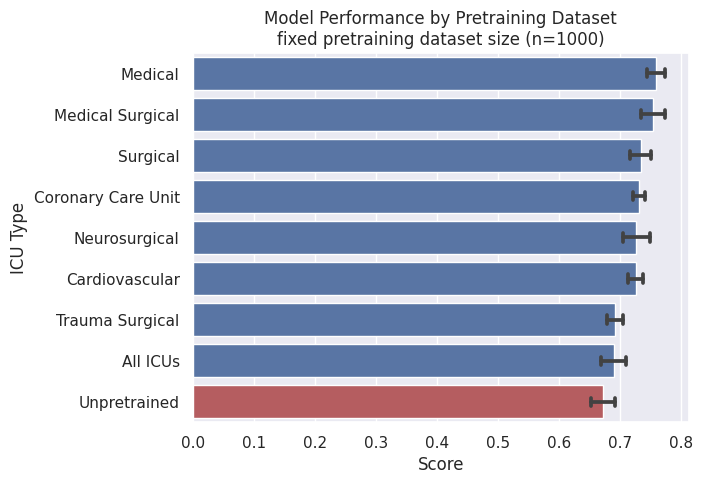

In [128]:
plot_order = fixed_pretraining.groupby('ICU Type')['Score'].mean().sort_values(ascending=False).index.values
clrs = ['r' if (x == 'Unpretrained') else 'b' for x in plot_order ]

sns.barplot(
    data=fixed_pretraining, 
    x="Score", 
    y="ICU Type", 
    # err_style="bars", 
    errorbar=("se", 2),
    capsize=0.2,
    order=plot_order,
    orient='h',
    palette=clrs
).set(title="Model Performance by Pretraining Dataset\nfixed pretraining dataset size (n=1000)")

[Text(0.5, 1.0, 'Model Performance by Pretraining Dataset')]

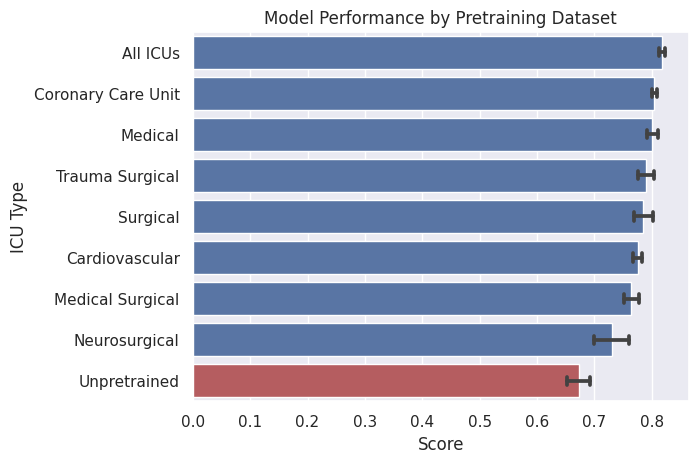

In [129]:
plot_order = max_pretraining.groupby('ICU Type')['Score'].mean().sort_values(ascending=False).index.values
clrs = ['r' if (x == 'Unpretrained') else 'b' for x in plot_order ]

sns.barplot(
    data=max_pretraining, 
    x="Score", 
    y="ICU Type", 
    # err_style="bars", 
    errorbar=("se", 2),
    capsize=0.2,
    order=plot_order,
    orient='h',
    palette=clrs
).set(title='Model Performance by Pretraining Dataset')